# Keras Einstiegsbeispiel

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from sklearn.model_selection import train_test_split #Daten in Trainings und Testdaten splitten
from sklearn.preprocessing import StandardScaler #numerischen Daten auf eine Skala zu skalieren
from sklearn.metrics import confusion_matrix #Confusion Matrix erzeugen (um Güte des Modells abschätzen)
from sklearn.preprocessing import StandardScaler #Fkt um alle numerischen Daten auf eine Skala zu skalieren

In [3]:
from keras.models import Sequential #Model importieren
from keras.layers import Dense #Layers importieren

Using TensorFlow backend.


### Datenaufbereitung

In [4]:
dataset = pd.read_csv('../../Daten/csv/diabetes.csv')
dataset.head(3)
dataset.shape

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


(768, 9)

In [5]:
"""
Trennen der:
    äbhängigen Variablen (Features) --> Spalte 1-8 und der 
    unabhängigen/predictiv Variablen (Labels) --> Spalte 9 / Outcome (hat Diabetes oder nicht)
"""
X = dataset.iloc[:,0:8].values
y = dataset.iloc[:,8].values #mit values wird ein Array erstellt

'\nTrennen der:\n    äbhängigen Variablen (Features) --> Spalte 1-8 und der \n    unabhängigen/predictiv Variablen (Labels) --> Spalte 9 / Outcome (hat Diabetes oder nicht)\n'

In [6]:
X
y

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [7]:
len([(i) for i in y if i==1])

268

### Aufteilung der Daten in Test und Trainingsdaten
`stratify = y` bei diesem Attribut werden die Daten je nach Anzahl Elementen in den Klassen aufgeteilt.
Dies hat bei unausgeglichener Klassenaufteilung wie beispielsweise 100 positive und 5000 negative Beispieldaten eine Vorteil.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, b, shuffle=True, stratify = y)
X_train.shape
X_test.shape
dataset.shape

(614, 8)

(154, 8)

(768, 9)

In [9]:
type(X_train)

numpy.ndarray

### Standard Scaling nur für X-Values --> Daten normalisieren
Wenn wir Neuronale Netze und Deep Learning basierte Systeme nutzen, dann empfiehlt es sich üblicherweise die Daten zu Standardisieren. 

Der **StandardScaler** transformiert die Daten so, dass ihre Verteilung einen Mittelwert von 0 und ein Standartabweichung von 1 hat.

Vergleichbarkeit der DS schaffen, unterschiedliche Verteilungen der Daten --> diese anpassen

#### 1. Mögl.

In [37]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### 2. Mögl

In [10]:
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

### Aufbau des Neuronalen Netzes
1 Input-Layer, 2 Hidden Layer und 1 Output Layer

**Dense** = Fully Connected Layer (jedes Neuron ist mit dem nächsten Neuron verbunden)

**Sequential** = Das Sequential model ist ein linearer Stack/Stapel von Layern/ Schichten

**Input Shape** = *(Anz. Spalten in der Matrix)* Das Model muss wissen welchen Input Shape es bekommt, deshalb wird dieser im 1. Layer angegeben. -> 3. Möglichkeiten

Aktivierungsfunktionen:
* Hidden Layer: Rectifier-Funktion (ReLU) -> gibt x oder 0 zurück
* Output Layer: Sigmoid-Funktion

Verwendung des Adam Optimizer für die Kosten/Loss Funktion



In [39]:
#Model erzeugen
#Sequenzielles Netz, d.h. Layer für Layer
model = Sequential()
"""
2. Mögl. 
model = Sequential([
    Dense(32, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax'),
])
"""

"\n2. Mögl. \nmodel = Sequential([\n    Dense(32, activation='relu', input_shape=(784,)),\n    Dense(10, activation='softmax'),\n])\n"

In [40]:
#Input layer und 1. Hidden Layer erzeugen
model.add(Dense(
    units = 6, #6 Neuronen im Hidden Layer
    kernel_initializer = "uniform",
    activation = "relu", #Verwendung der ReLU Aktivierungsfkt.
    input_dim = 8 #8 Neuronen im Input Layer
#     2. Mögl.: input_shape = (8,) Angabe des Shapes der Daten
#     3. Mögl.: bzw. batch_input_shape = (8,None) None kann man angeben wenn man die Größe nicht kennt
))

#2. Hidden Layer erzeugen
model.add(Dense(
    6, #anz units
    kernel_initializer = "uniform", #Verteilung die vorliegt angeben, uniform = Gleichverteilung
    activation = "relu",

))

#Output Layer
model.add(Dense(
    1,
    kernel_initializer = "uniform",
    activation = "sigmoid"
))

#### Zusammenfassung des Modells

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


### Lernprozess konfigurieren/compilieren
Bevor man das Modell trainieren kann muss man den Lernprozess konfigurieren mit Hilfe der `compile()` Methode.

#### Lossfunctions
Für ein binäreres (Output: 0 oder 1) Klassifikationsproblem: `loss='binary_crossentropy'`

Für ein Mulit-Klassen Klassifikationsproblem: `loss='categorical_crossentropy'`

Für ein mean squared error regression problem -> Regressionsproblem: `loss='mse'` --> dafür brauch man eig. keine metrics

In [41]:
model.compile(
    loss="binary_crossentropy", #Fehlerminimierungsfkt./Lossfunction/ --> bekommen am Ende Werte zw. 1 oder 0
    optimizer = "adam", #Optimierungsfkt
#     optimizer=optimizers.RMSprop(lr=0.001) #Lernrate manuell festlegen
    metrics=['accuracy']
)

In [42]:
# For custom metrics
# neben der accuracy wird auch der MW mit ausgegeben
import keras.backend as K

def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', mean_pred])

### Model anlernen mit Trainingsdaten
Zum trainieren von Modellen gibt es 3 Möglichkeiten
* `model.fit()`
* `model.fit_generator()`
* `model.train_on_batch()` --> training fur nur eine batch-size (epoch = 1) --> Output: [loss, accuracy]

In [43]:
batch_size = 5
epochs = 100

### `fit()`
**Input**: Die Eingabedaten von Keras Modellen müssen Numpy-Arrays sein.


`validation_data = tuple (x_val, y_val)`

gibt die Loss Function und die Accuracy nach jeder Epoche für z.B. die Testdaten mit aus

Das Model wird mit diesen Daten nicht trainiert

#### Modell trainieren + Zeit für Training messen

In [ ]:
model.fit(
    data,
    labels,
    batch_size = 10,  #Aufteilung in Gruppen mit Größe 10
    epochs = 5, # Anz. Trainigsdurchdurchläufe -> 10 Batches pro Epcohe
    verbose = 1, #Anzeigen eines Trainingsverlaufes -> Default = 1 --> 0 = kein Verlauf anzeigen
)

In [44]:
start_time = time.clock()
history = model.fit(
    X_train,
    y_train,
    batch_size = batch_size,
    epochs = epochs, #Trainigsdurchdurchläufe
    validation_data=(X_test, y_test) 
)
elapsed_time = time.clock() - start_time

Train on 614 samples, validate on 154 samples
Epoch 1/100
614/614 [==============================] - 1s 1ms/step - loss: 0.6849 - acc: 0.6515 - mean_pred: 0.4887 - val_loss: 0.6717 - val_acc: 0.6494 - val_mean_pred: 0.4714
Epoch 2/100
614/614 [==============================] - 0s 441us/step - loss: 0.6427 - acc: 0.6515 - mean_pred: 0.4452 - val_loss: 0.5963 - val_acc: 0.6494 - val_mean_pred: 0.4111
Epoch 3/100
614/614 [==============================] - 0s 368us/step - loss: 0.5686 - acc: 0.7231 - mean_pred: 0.3793 - val_loss: 0.5166 - val_acc: 0.8117 - val_mean_pred: 0.3535
Epoch 4/100
614/614 [==============================] - 0s 415us/step - loss: 0.5185 - acc: 0.7704 - mean_pred: 0.3415 - val_loss: 0.4777 - val_acc: 0.7987 - val_mean_pred: 0.3492
Epoch 5/100
614/614 [==============================] - 0s 324us/step - loss: 0.4961 - acc: 0.7655 - mean_pred: 0.3386 - val_loss: 0.4529 - val_acc: 0.8117 - val_mean_pred: 0.3477
Epoch 6/100
614/614 [==============================] - 0s 435

614/614 [==============================] - 0s 392us/step - loss: 0.4579 - acc: 0.7769 - mean_pred: 0.3521 - val_loss: 0.4046 - val_acc: 0.8052 - val_mean_pred: 0.3640
Epoch 92/100
614/614 [==============================] - 0s 317us/step - loss: 0.4573 - acc: 0.7769 - mean_pred: 0.3409 - val_loss: 0.4060 - val_acc: 0.8117 - val_mean_pred: 0.3730
Epoch 93/100
614/614 [==============================] - 0s 327us/step - loss: 0.4582 - acc: 0.7818 - mean_pred: 0.3517 - val_loss: 0.4047 - val_acc: 0.8117 - val_mean_pred: 0.3726
Epoch 94/100
614/614 [==============================] - 0s 324us/step - loss: 0.4576 - acc: 0.7769 - mean_pred: 0.3532 - val_loss: 0.4026 - val_acc: 0.8052 - val_mean_pred: 0.3599
Epoch 95/100
614/614 [==============================] - 0s 335us/step - loss: 0.4573 - acc: 0.7769 - mean_pred: 0.3513 - val_loss: 0.4025 - val_acc: 0.8052 - val_mean_pred: 0.3634
Epoch 96/100
614/614 [==============================] - 0s 501us/step - loss: 0.4571 - acc: 0.7834 - mean_pred: 0

In [21]:
print('Trainingsdurchlaufzeit: {0:.2f}s'.format(round(elapsed_time,)))

Trainingsdurchlaufzeit: 24.00s


## Modell abspeichern
https://www.youtube.com/watch?v=7n1SpeudvAE

Die `save()` funktion speichert: 
* die Architketur des Models und erlaubt dieses wieder zu kreieren
* Gewichte des Models
* Trainingskonfiguration (optimizer, loss)
* den Status des Optimizer, das ermöglicht das Training fort zu setzen, wo man aufgehört hat

In [ ]:
path = "./Models/"
model_file_name = "Spelling_Correction_Model"
files = [f for f in listdir(path) if isfile(join(path, f))]
count = 0
for f in files:
    if (f.find(model_file_name) != -1):
        count +=1
filename = '' + path + model_file_name + str(count+1) + '.h5'
model.save(filename)

## Modell laden

In [ ]:
from keras.models import load_model
new_model = load_model('Spelling_Correction_Model1.h5')

In [ ]:
#new_model.summary()
new_model.get_weights()
new_model.optimizer

### `fit_generator()`
auslagern des Datenladen -> Daten werden nicht komplett in den HS geladen -> für große Datenmengen

**Input:** nimmt als Input einen Generator statt ein numpy array

*Hinweise:*
* Labels und Features müssen beide unbedingt als numpy array zurück gegeben werden
* for-Schleifen in der while true Schleife sind nicht optimal

**Genarator**
* ein Genrator ist eine unendliche Schleife (deshab while(true)) der immer wieder neue Objekte zurück gibt 
* Output: Liefert ein Tupel (Eingaben, Ziele) bzw. (inputs, labels)
* Alle Arrays sollten die gleiche Anzahl an Samples enthalten.
* Es wird erwartet, dass der Generator seine Daten unbegrenzt wiederholt.
* Ein Epoch endet, wenn samples_per_epoch Samples vom Modell gesehen wurden

[Was ist yield?](https://stackoverflow.com/questions/231767/what-does-the-yield-keyword-do/)

[Generatoren](https://www.python-kurs.eu/generatoren.php)

#### Generator Beispiel

In [198]:
def generator(number = 2):
    while True:
        if(number%2 == 0): #ist Zahl eine gerade Zahl
            yield number #falls zahl gerade, wird diese zurück gegeben
        number += 1
bsp_generator = generator() #Generator Obj.

In [199]:
for i in range(10):
    print(bsp_generator.send(None)) #send: falls man Werte an den Generator senden will (z.B. zahlen als Var.)

2
4
6
8
10
12
14
16
18
20


**Ablauf**
* Der Generator wir aufgerufen mit z.B. 2
* Sprung in die while Schleife
* if Bed. erfüllt
* Rückgabe der Zahl -> Sprung aus Fkt.
* bei erneuter Auruf des Generator befinden wir uns weiterhin in der while Schleife
* und man startet nun bei den Anweisungen nach yield, also im Bsp. bei number += 1
* die Generator merkt sich an welcher Stelle er sich befindet -> d.h. die number wird bei einem erneuten Fkt. Aufruf nicht 2 (da man in der while-Schleife weitermacht) sondern hat den schon iterierten Wert


In [175]:
def gen(features, labels, batch_size):
    print('generator initiated')
    idx = 0
    while True:
        i = idx * batch_size
        j = min((idx + 1) * batch_size, len(features))
        yield features[i:j], labels[i:j]
        print('generator yielded a batch %d' % idx)
        idx += 1
        if j == len(features):
            idx = 0
tr_gen = gen(X_train, y_train, 10)
#break wenn alle Feature gelesen

In [176]:
history = model.fit_generator(
    generator=tr_gen,
    steps_per_epoch=(len(X_train)/batch_size)+1,  #(len(X_train)/batch_size)+1 anzahl der Schritte pro Epoche
    max_queue_size=10, #default = 10
    workers=6, #default = 1
    use_multiprocessing=False #default = False
)

generator initiated
generator yielded a batch 0
generator yielded a batch 1
generator yielded a batch 2
generator yielded a batch 3
generator yielded a batch 4
generator yielded a batch 5
generator yielded a batch 6
generator yielded a batch 7
generator yielded a batch 8
Epoch 1/1
  1/123 [..............................] - ETA: 0s - loss: 1.6668 - acc: 0.9000generator yielded a batch 9
generator yielded a batch 10
generator yielded a batch 11
generator yielded a batch 12
generator yielded a batch 13
generator yielded a batch 14
generator yielded a batch 15
generator yielded a batch 16
generator yielded a batch 17
generator yielded a batch 18
generator yielded a batch 19
generator yielded a batch 20
generator yielded a batch 21
generator yielded a batch 22
generator yielded a batch 23
generator yielded a batch 24
generator yielded a batch 25
generator yielded a batch 26
generator yielded a batch 27
generator yielded a batch 28
generator yielded a batch 29
generator yielded a batch 30
ge

## Modellvalidierung

Güte des Modells mit Testdaten: 78%
Prüfen ob Vorhersagen mit den Labels/Predictive Variablen übereinstimmt in dem man die Testdaten auf das Modell anwendet

In [86]:
history.history['acc'][0:4] #Ausgabe der accracy des Trainings -> history.history['loss']

[0.84375]

Text(0.5,1,'Accuracy')

Text(0.5,1,'Loss Function')

Text(0.5,1,'Accuracy')

Text(0.5,1,'Loss Function')

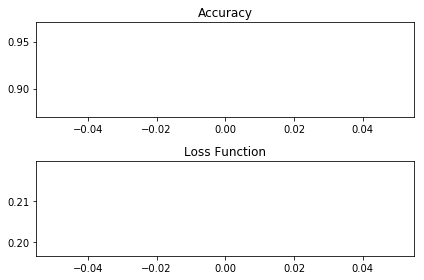

In [160]:
diag, axes = plt.subplots(nrows = 2, ncols = 1)
for ax in axes:
    axes[0].plot(history.history['acc'], c="b")
    axes[0].set_title('Accuracy')
    axes[1].plot(history.history['loss'], c="g")
    axes[1].set_title('Loss Function')
plt.tight_layout() #verhindert das es keine Überlappungen gibt

In [ ]:
training_accuracy = history.history['acc']
test_accuracy = history.history['val_acc']

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Visualize accuracy history
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.show();

### Vorhersagen/ Prognosen
Um die Güte des neuronalen Netzes zu beurteilen, können nun die Ergebnisse anhand des Testdatensatzes evaluiert werden:

In [82]:
print('Ausgabe des loss value und der accuracy für das Model mit den Testdaten')
model.evaluate(X_test, y_test, batch_size=1, verbose=0)
y_pred = model.predict(X_test)

Ausgabe des loss value und der accuracy für das Model mit den Testdaten


[0.5853474672685125, 0.74025974025974028]

In [62]:
y_pred = (y_pred > 0.5) #gibt nur 2 Klassen mit 0 und 1 --> alle Werte unter 0,5 = 0 | über 0,5 = 1

#### Confusion-Matrix
korrekte Vorhersagen befinden sich in der Diagonalen


In [24]:
# Erzeugen der Confusion Matrix, an welcher die tatsächliche Präzesion bestimmt werden kann
y_pred[0:10]
y_test[0:10]
cm = confusion_matrix(y_test, y_pred)
cm

array([[False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True]], dtype=bool)

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

array([[91, 18],
       [17, 28]], dtype=int64)

## Callbacks
https://www.youtube.com/watch?v=Gl-N3xr5zLI

### Training eher unterbrechen 
In keras gibt es Callback Funktionen, welche während eines Trainingsprozesses z.B. am Ende einer Epoche aufgerufen werden können.

*Beispiel:*

Die Kosten/Loss Funktion der Test/Validationdaten soll nach jeder Epoche überwacht werden.

Falls die Loss Function sich nach 2 Epochen nicht verbessert, soll das Training unterbrochen werden.

`EarlyStopping()` (vor kompletten Trainingsdurchlauf beenden) `patience = 2` (nach 2 Epochen)

Wir werden nicht das beste Modell bekommen, aber das Modell zwei Epochen nach dem besten Modell. ??

Mit `ModelCheckpoint` speichern wir das Model in eine Datei nach jedem Checkpoint -> sinvoll bei langandauernden Trainings, da diese ausversehen unterbrechen werden konnten
`save_best_only=True` nu rad beste Modell wird abgespeichert


In [1]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
# callback soll das Training eher unterbrechen und das beste Modell speichern
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint(filepath = 'Models/best_model.h5', monitor = 'val_loss', save_best_only = True)]

Using TensorFlow backend.


In [19]:
model.fit(
    X_train,
    y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = (X_test, y_test),
    callbacks = callbacks,
)

Train on 614 samples, validate on 154 samples
Epoch 1/100
614/614 [==============================] - 0s 238us/step - loss: 0.4675 - acc: 0.7704 - val_loss: 0.4446 - val_acc: 0.7792
Epoch 2/100
614/614 [==============================] - 0s 240us/step - loss: 0.4654 - acc: 0.7704 - val_loss: 0.4447 - val_acc: 0.7857
Epoch 3/100
614/614 [==============================] - 0s 207us/step - loss: 0.4645 - acc: 0.7704 - val_loss: 0.4484 - val_acc: 0.7857


### Tensorboard
in CMD eingeben: `tensorboard --logdir logs`


ein link wird bereit gestellt, z.B. http://flo-pc:6006/

In [1]:
    from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [25]:
model.fit(
    X_train,
    y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = (X_test, y_test),
    callbacks = [
        TensorBoard(log_dir='./logs',)
    ]
)

Train on 614 samples, validate on 154 samples
Epoch 1/100
614/614 [==============================] - 0s 446us/step - loss: 0.4277 - acc: 0.7932 - val_loss: 0.4620 - val_acc: 0.7792
Epoch 2/100
614/614 [==============================] - 0s 335us/step - loss: 0.4270 - acc: 0.7964 - val_loss: 0.4650 - val_acc: 0.7857
Epoch 3/100
614/614 [==============================] - 0s 316us/step - loss: 0.4277 - acc: 0.7964 - val_loss: 0.4655 - val_acc: 0.7857
Epoch 4/100
614/614 [==============================] - 0s 317us/step - loss: 0.4272 - acc: 0.7948 - val_loss: 0.4662 - val_acc: 0.7792
Epoch 5/100
614/614 [==============================] - 0s 313us/step - loss: 0.4254 - acc: 0.7964 - val_loss: 0.4681 - val_acc: 0.7792
Epoch 6/100
614/614 [==============================] - 0s 396us/step - loss: 0.4259 - acc: 0.7964 - val_loss: 0.4690 - val_acc: 0.7792
Epoch 7/100
614/614 [==============================] - 0s 402us/step - loss: 0.4244 - acc: 0.7948 - val_loss: 0.4660 - val_acc: 0.7857
Epoch 8/1

Epoch 61/100
614/614 [==============================] - 0s 321us/step - loss: 0.4060 - acc: 0.8127 - val_loss: 0.4888 - val_acc: 0.7597
Epoch 62/100
614/614 [==============================] - 0s 688us/step - loss: 0.4044 - acc: 0.8111 - val_loss: 0.4867 - val_acc: 0.7727
Epoch 63/100
614/614 [==============================] - 0s 505us/step - loss: 0.4047 - acc: 0.8094 - val_loss: 0.4858 - val_acc: 0.7727
Epoch 64/100
614/614 [==============================] - 0s 463us/step - loss: 0.4045 - acc: 0.8127 - val_loss: 0.4900 - val_acc: 0.7662
Epoch 65/100
614/614 [==============================] - 0s 474us/step - loss: 0.4046 - acc: 0.8143 - val_loss: 0.4841 - val_acc: 0.7662
Epoch 66/100
614/614 [==============================] - 0s 401us/step - loss: 0.4049 - acc: 0.8094 - val_loss: 0.4935 - val_acc: 0.7597
Epoch 67/100
614/614 [==============================] - 0s 335us/step - loss: 0.4037 - acc: 0.8046 - val_loss: 0.4840 - val_acc: 0.7597
Epoch 68/100
614/614 [==========================